In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [3]:
data = pd.read_sql('''SELECT * FROM litecoin''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Litecoin,LTC,2013-04-29 23:59:59,4.57360,4.22564,4.36676,4.38390,0.0,7.538896e+07
1,2,Litecoin,LTC,2013-04-30 23:59:59,4.57238,4.16896,4.40352,4.29649,0.0,7.402092e+07
2,3,Litecoin,LTC,2013-05-01 23:59:59,4.35686,3.52029,4.28954,3.80101,0.0,6.560460e+07
3,4,Litecoin,LTC,2013-05-02 23:59:59,4.03930,3.00717,3.78002,3.37198,0.0,5.828798e+07
4,5,Litecoin,LTC,2013-05-03 23:59:59,3.45361,2.39594,3.39044,3.04491,0.0,5.269485e+07


In [4]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [5]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        2991 non-null   object 
 1   Symbol      2991 non-null   object 
 2   Date        2991 non-null   object 
 3   High        2991 non-null   float64
 4   Low         2991 non-null   float64
 5   Open        2991 non-null   float64
 6   Close       2991 non-null   float64
 7   Volume      2991 non-null   float64
 8   Marketcap   2991 non-null   float64
 9   Range       2991 non-null   float64
 10  Difference  2991 non-null   float64
dtypes: float64(8), object(3)
memory usage: 257.2+ KB


In [6]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        2991 non-null   object        
 1   Symbol      2991 non-null   object        
 2   Date        2991 non-null   datetime64[ns]
 3   High        2991 non-null   float64       
 4   Low         2991 non-null   float64       
 5   Open        2991 non-null   float64       
 6   Close       2991 non-null   float64       
 7   Volume      2991 non-null   float64       
 8   Marketcap   2991 non-null   float64       
 9   Range       2991 non-null   float64       
 10  Difference  2991 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 257.2+ KB


In [8]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03,2991.000000,2991.000000
mean,51.344396,46.931226,49.247365,49.279008,1.284851e+09,2.934139e+09,4.413170,0.031643
std,66.572301,59.474423,63.256275,63.240464,2.247871e+09,3.964279e+09,9.293010,6.074325
min,1.344810,1.113740,1.153240,1.157010,0.000000e+00,3.789242e+07,0.009280,-105.085405
25%,3.841130,3.730025,3.792325,3.794135,2.242845e+06,1.614311e+08,0.144545,-0.414571
50%,31.386569,27.855200,29.737400,29.900200,1.158300e+08,1.477191e+09,1.286300,-0.005570
75%,64.241222,60.338469,61.976711,62.025043,2.108696e+09,3.854304e+09,4.463479,0.388635
max,412.960141,345.298839,387.869178,386.450779,1.799426e+10,2.579652e+10,148.675156,103.694992


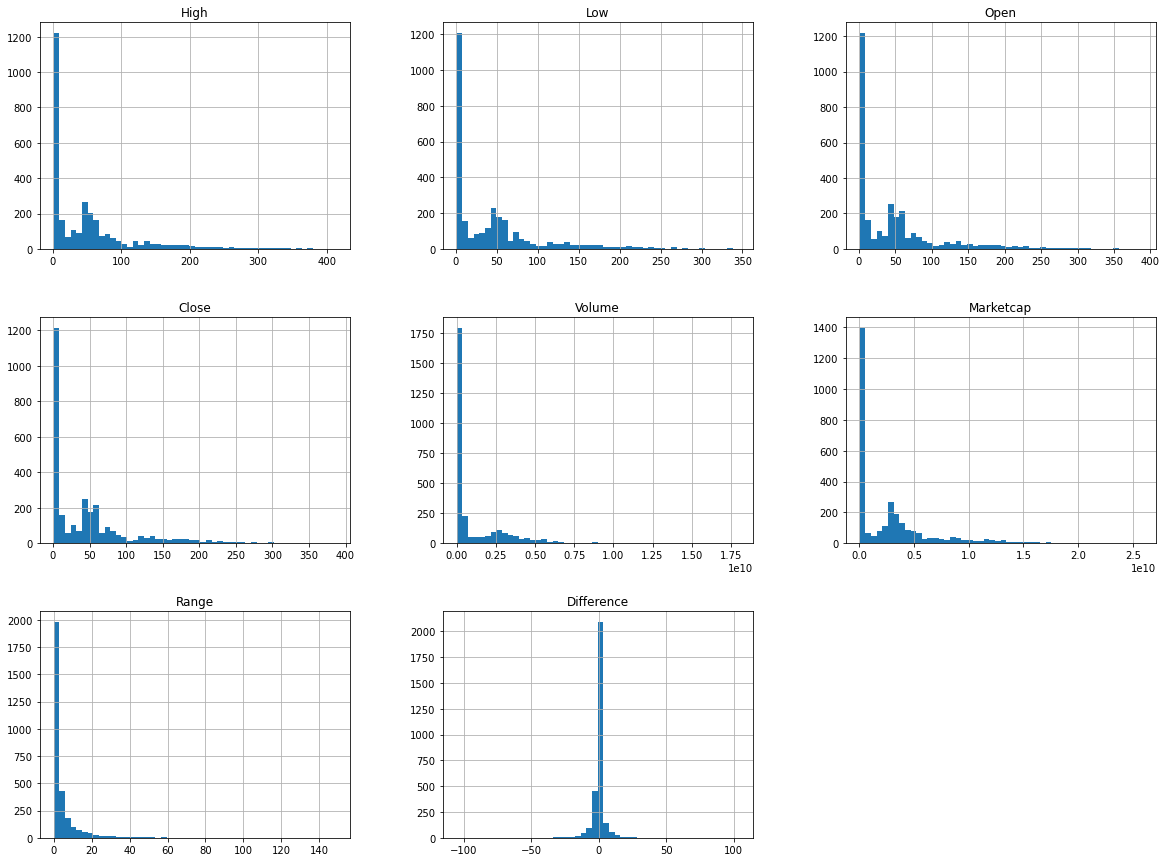

In [9]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [10]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,2942,2935,1698,1723,1696,1715,2814,2911,2857,2944
Date,2021-05-19 23:59:59,2021-05-12 23:59:59,2017-12-22 23:59:59,2018-01-16 23:59:59,2017-12-20 23:59:59,2018-01-08 23:59:59,2021-01-11 23:59:59,2021-04-18 23:59:59,2021-02-23 23:59:59,2021-05-21 23:59:59
Difference,-105.085405,-74.585677,-54.324982,-44.486008,-34.983002,-31.962006,-31.842606,-31.548217,-31.188492,-30.738948


In [11]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,1688,1687,1752,2928,1713,2947,1694,2932,2903,2847
Date,2017-12-12 23:59:59,2017-12-11 23:59:59,2018-02-14 23:59:59,2021-05-05 23:59:59,2018-01-06 23:59:59,2021-05-24 23:59:59,2017-12-18 23:59:59,2021-05-09 23:59:59,2021-04-10 23:59:59,2021-02-13 23:59:59
Difference,103.694992,65.945007,53.779999,50.85969,46.686005,41.191475,39.382996,39.360755,33.904182,28.993276


In [12]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [13]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [14]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

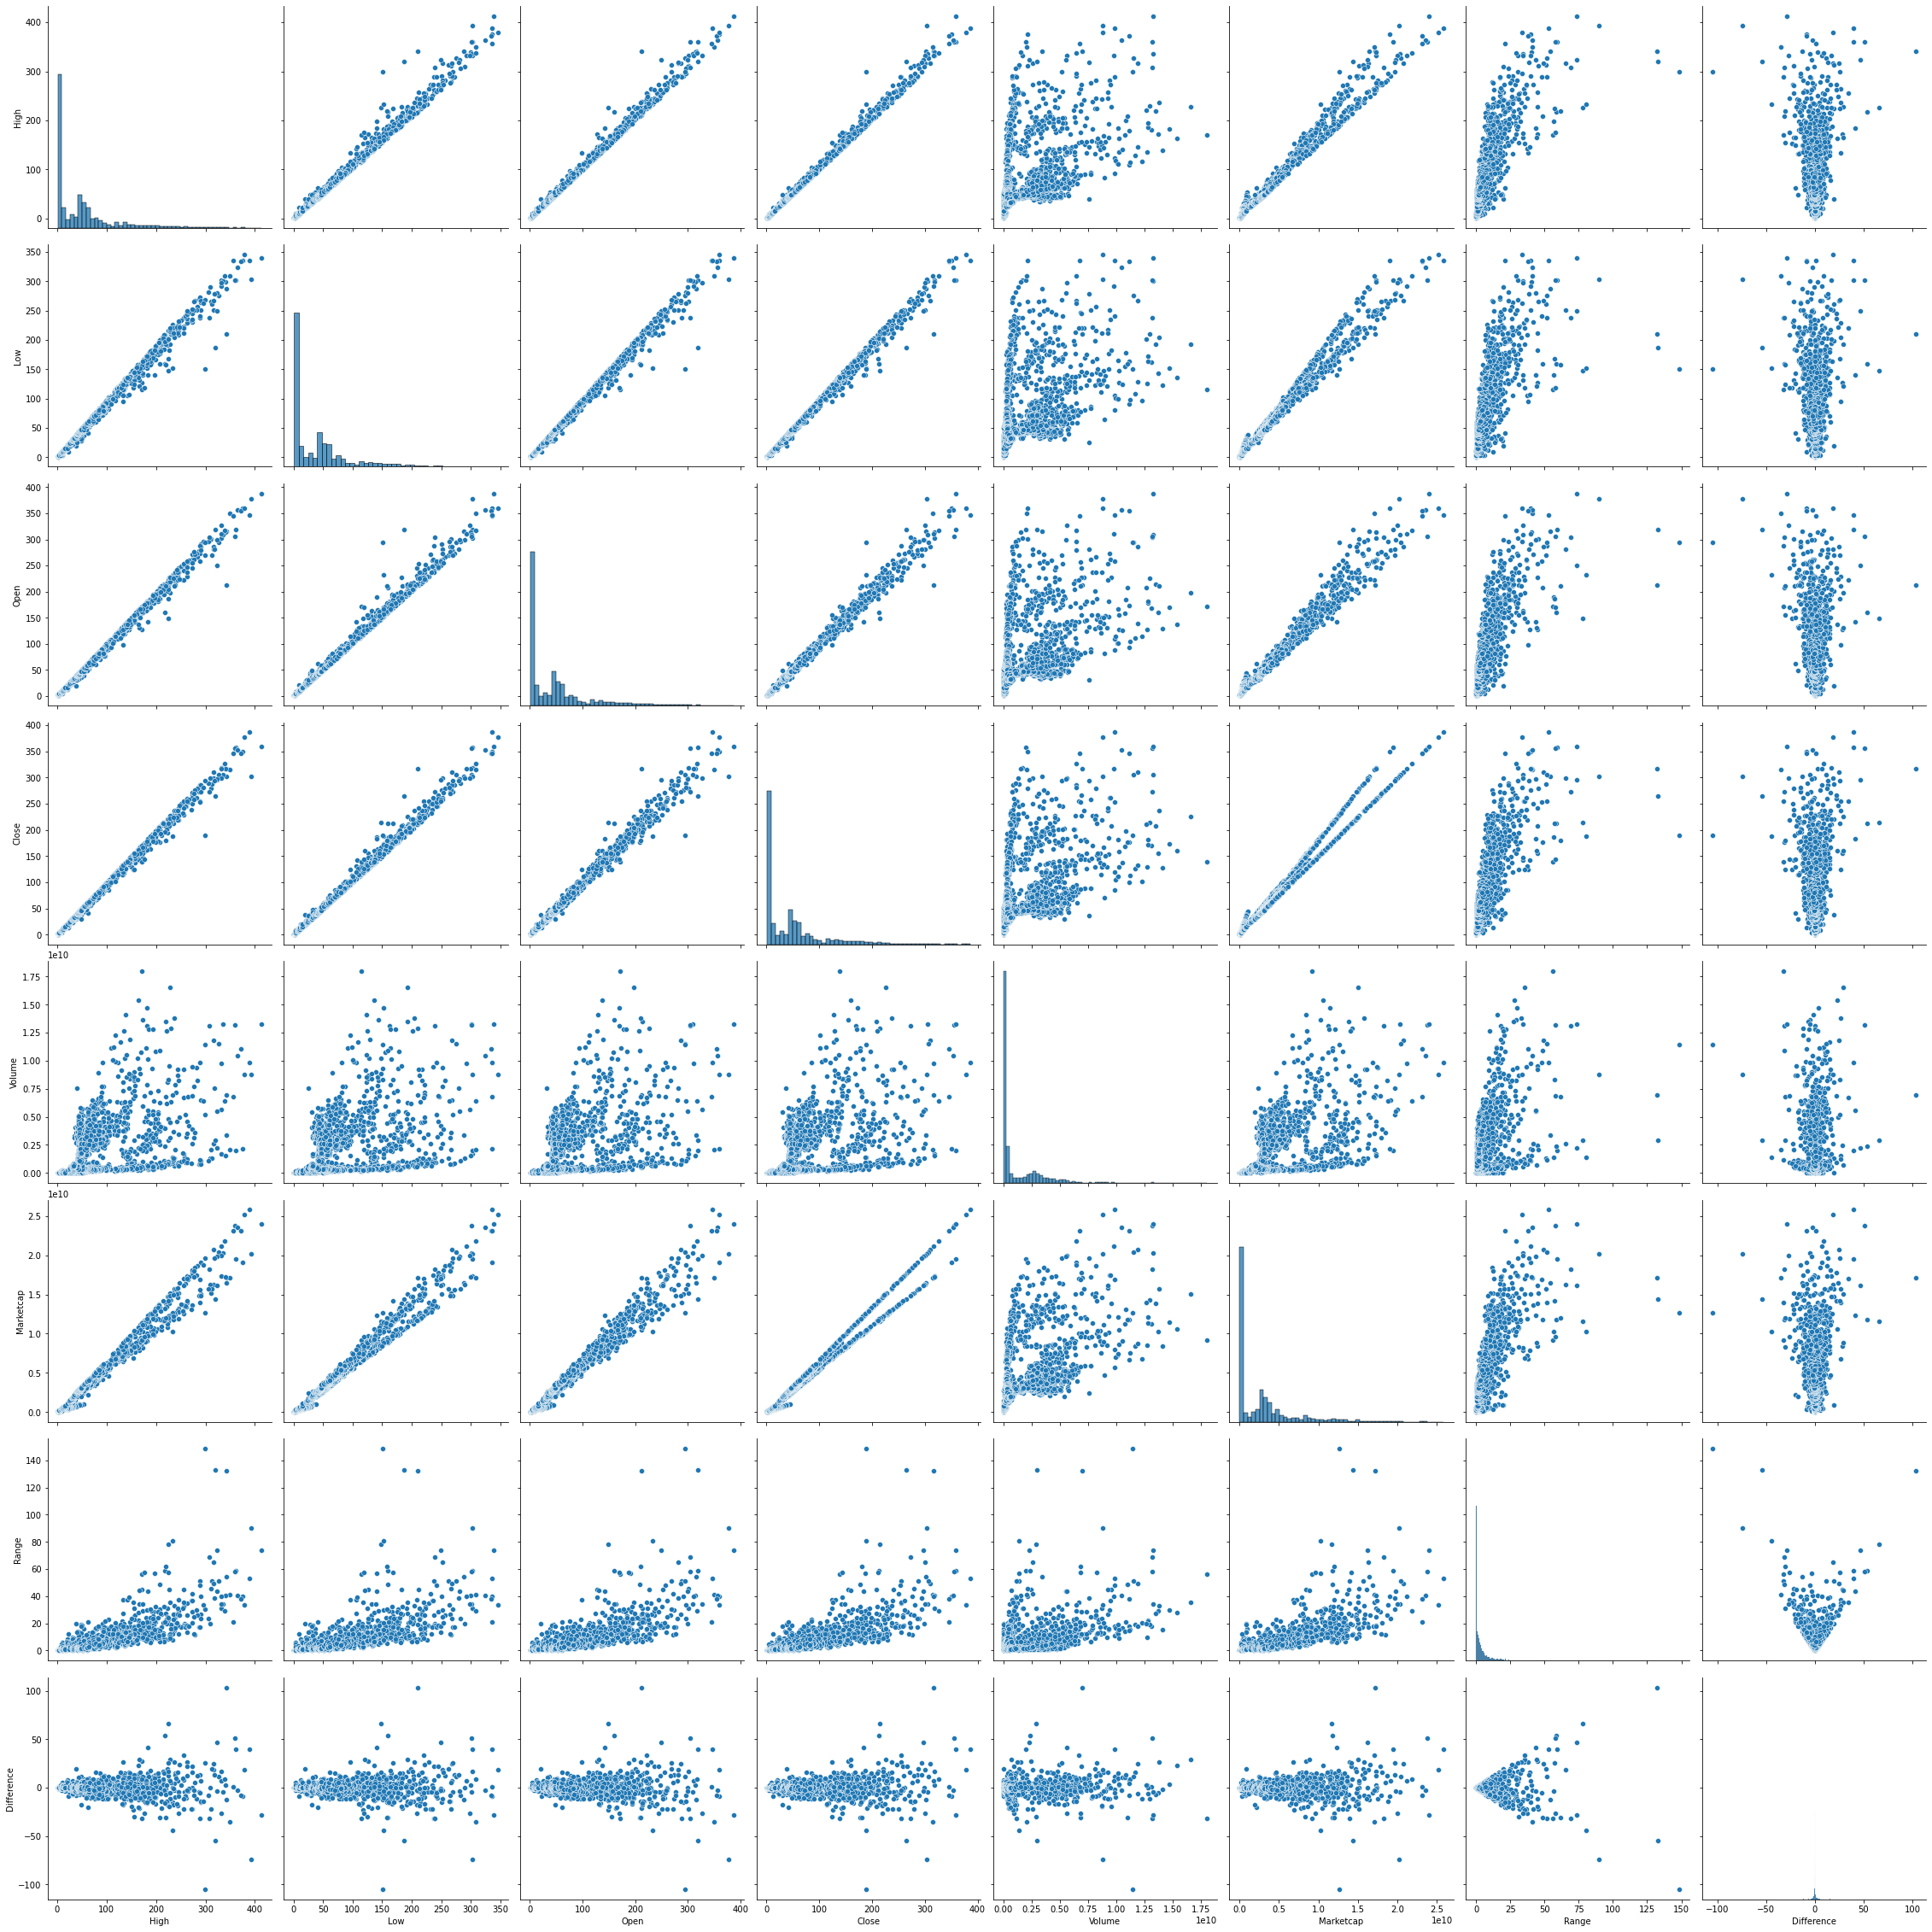

In [15]:
sns.pairplot(data,height=4);
